In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the ticker symbol for KOSPI (Korea Stock Exchange)
ticker_symbol = "^KS11"

# Define the start and end dates
start_date = "2020-02-04"
end_date = "2020-11-13"

In [ ]:
# Download the historical data
kospi_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the head of the downloaded data
print(kospi_data.head())

# Specify the full file path for saving the CSV file
csv_filepath = "/content/drive/MyDrive/DSFM/kospi_data_2020.csv"

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-02-04  2121.219971  2162.320068  2120.530029  2157.899902  2157.899902   
2020-02-05  2177.260010  2181.520020  2154.879883  2165.629883  2165.629883   
2020-02-06  2184.770020  2229.989990  2182.250000  2227.939941  2227.939941   
2020-02-07  2221.489990  2223.919922  2198.139893  2211.949951  2211.949951   
2020-02-10  2185.629883  2203.389893  2180.510010  2201.070068  2201.070068   

            Volume  
Date                
2020-02-04  624600  
2020-02-05  574400  
2020-02-06  695000  
2020-02-07  800200  
2020-02-10  609600  


In [ ]:
# Save the data to the specified CSV file path
kospi_data.to_csv(csv_filepath)

print(f"Data saved to {csv_filepath}")

Data saved to /content/drive/MyDrive/DSFM/kospi_data_2020.csv


In [ ]:
covid_data_url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"

In [ ]:
# Download COVID-19 case data from WHO
covid_data = pd.read_csv(covid_data_url)

# Filter data for South Korea
south_korea_data = covid_data[covid_data['Country_code'] == 'KR']

# Select only the 'Date_reported' and 'New_cases' columns
south_korea_data = south_korea_data[['Date_reported', 'New_cases']]

In [ ]:
# Convert the 'Date_reported' column to datetime
south_korea_data['Date_reported'] = pd.to_datetime(south_korea_data['Date_reported'])

# Filter COVID-19 data for the desired date range
start_date_covid = "2020-02-04"
end_date_covid = "2020-11-13"
south_korea_data = south_korea_data[(south_korea_data['Date_reported'] >= start_date_covid) & (south_korea_data['Date_reported'] <= end_date_covid)]

# Set the 'Date_reported' column as the index
south_korea_data.set_index('Date_reported', inplace=True)

# Print the head of the downloaded COVID-19 case data for South Korea
print(south_korea_data.head())

               New_cases
Date_reported           
2020-02-04             1
2020-02-05             5
2020-02-06             3
2020-02-07             0
2020-02-08             0


In [ ]:
# Specify the full file path for saving the COVID-19 case data CSV file
csv_filepath_covid = "/content/drive/MyDrive/DSFM/covid_data_2020.csv"

In [ ]:
# Save the COVID-19 case data to the specified CSV file path
south_korea_data.to_csv(csv_filepath_covid)

print(f"COVID-19 case data saved to {csv_filepath_covid}")

COVID-19 case data saved to /content/drive/MyDrive/DSFM/covid_data_2020.csv


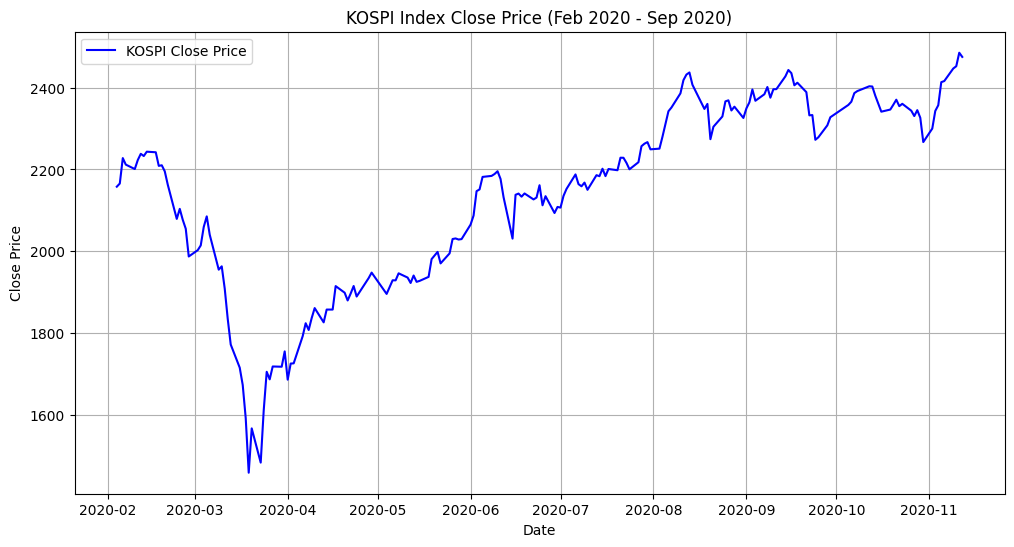

In [ ]:
# Create a plot of Close prices
plt.figure(figsize=(12, 6))
plt.plot(kospi_data.index, kospi_data['Close'], label='KOSPI Close Price', color='blue')
plt.title('KOSPI Index Close Price (Feb 2020 - Sep 2020)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

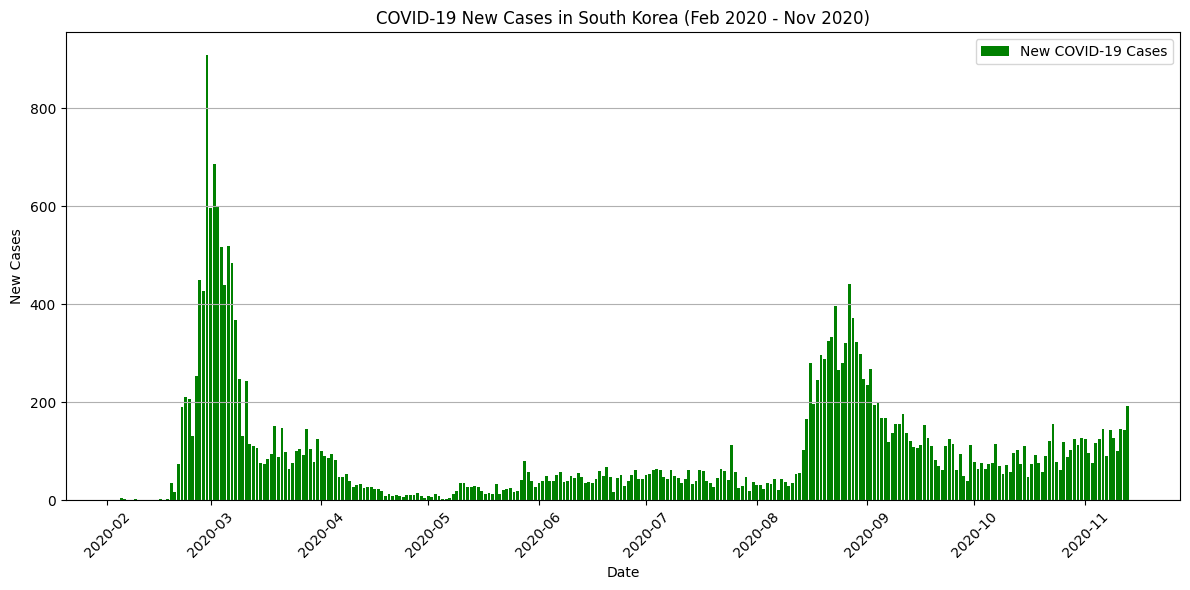

In [ ]:
# Create a bar graph of COVID-19 new cases
plt.figure(figsize=(12, 6))
plt.bar(south_korea_data.index, south_korea_data['New_cases'], label='New COVID-19 Cases', color='green')
plt.title('COVID-19 New Cases in South Korea (Feb 2020 - Nov 2020)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y')

# Display the bar graph
plt.tight_layout()
plt.show()

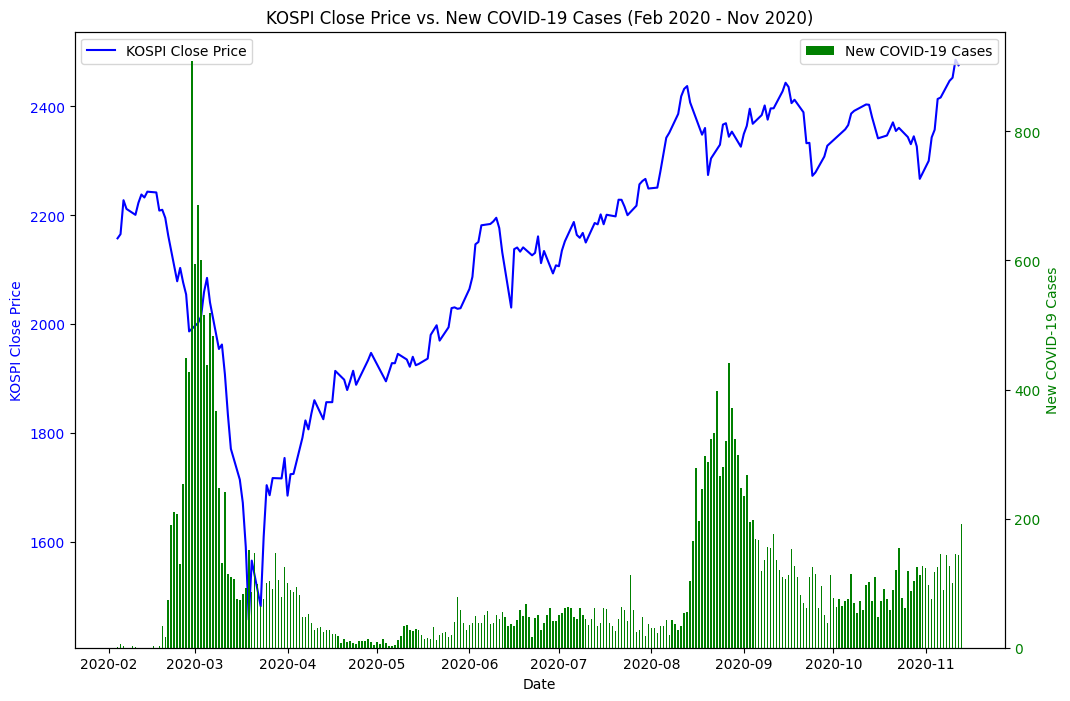

In [ ]:
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Subplot 1: KOSPI close price (Left Y-axis)
ax1.plot(kospi_data.index, kospi_data['Close'], label='KOSPI Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('KOSPI Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create Subplot 2 for COVID-19 new cases (Right Y-axis)
ax2 = ax1.twinx()  # Share the same x-axis
ax2.bar(south_korea_data.index, south_korea_data['New_cases'], label='New COVID-19 Cases', color='green', width=0.5)  # Increase width to space out bars
ax2.set_ylabel('New COVID-19 Cases', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Title for the combined graph
plt.title('KOSPI Close Price vs. New COVID-19 Cases (Feb 2020 - Nov 2020)')

# Display the combined graph
plt.show()

In [ ]:
ticker_symbol_kosdaq = "^KQ11"  # KOSDAQ index

# Define the start and end dates for KOSDAQ stock data
start_date_kosdaq = "2020-02-04"
end_date_kosdaq = "2020-11-13"

# Download the historical KOSDAQ stock data
kosdaq_data = yf.download(ticker_symbol_kosdaq, start=start_date_kosdaq, end=end_date_kosdaq)

# Specify the full file path for saving the KOSDAQ stock data CSV file
csv_filepath_kosdaq = "/content/drive/MyDrive/DSFM/kosdaq_data_2020.csv"

# Save the KOSDAQ stock data to the specified CSV file path
kosdaq_data.to_csv(csv_filepath_kosdaq)

print(f"KOSDAQ stock data saved to {csv_filepath_kosdaq}")

[*********************100%%**********************]  1 of 1 completed
KOSDAQ stock data saved to /content/drive/MyDrive/DSFM/kosdaq_data_2020.csv


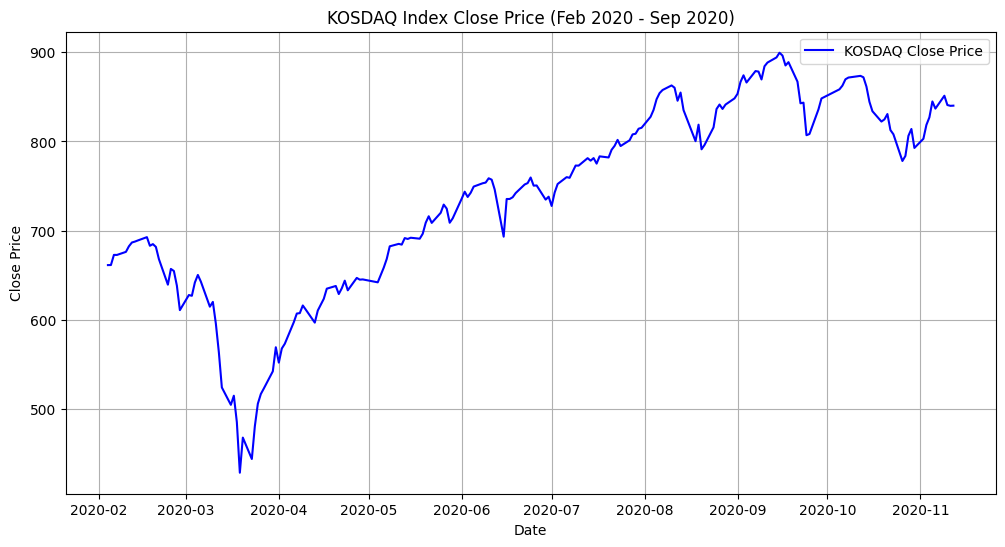

In [ ]:
# Create a figure and plot the close values
plt.figure(figsize=(12, 6))
plt.plot(kosdaq_data.index, kosdaq_data['Close'], label='KOSDAQ Close Price', color='blue')
plt.title('KOSDAQ Index Close Price (Feb 2020 - Sep 2020)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Display the graph
plt.show()

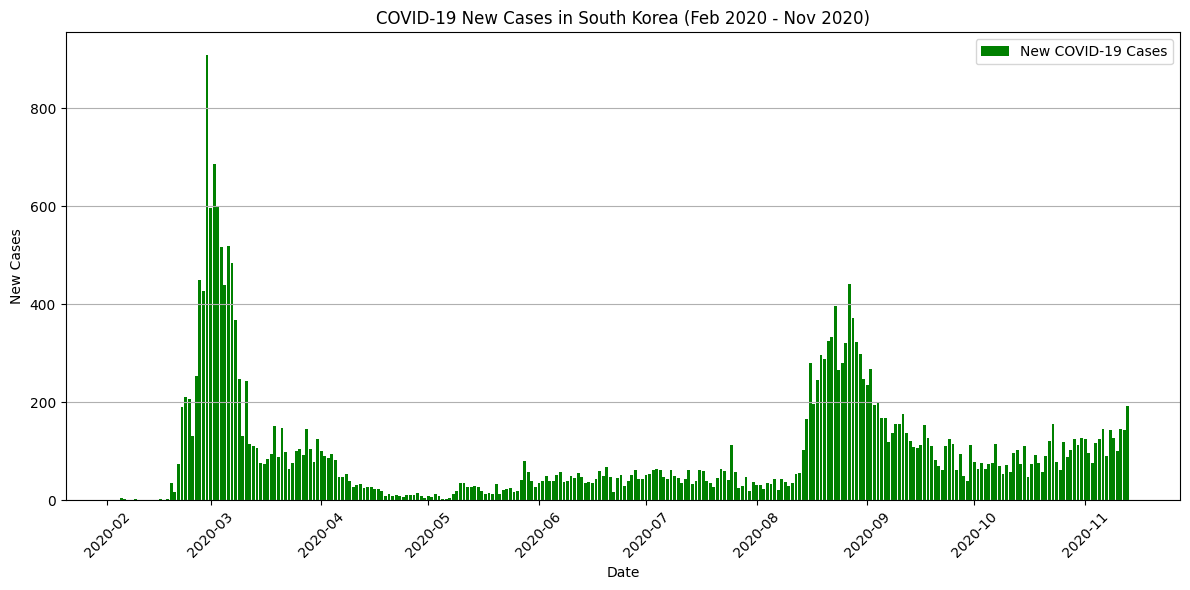

In [ ]:
# Create a bar graph of COVID-19 new cases
plt.figure(figsize=(12, 6))
plt.bar(south_korea_data.index, south_korea_data['New_cases'], label='New COVID-19 Cases', color='green')
plt.title('COVID-19 New Cases in South Korea (Feb 2020 - Nov 2020)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y')

# Display the bar graph
plt.tight_layout()
plt.show()

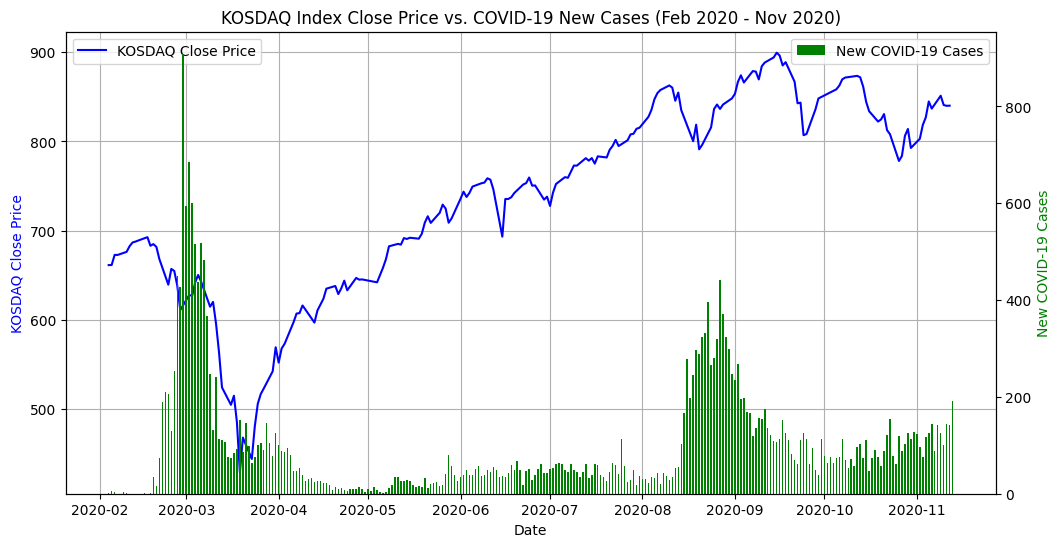

In [ ]:
# Create a figure with a single subplot
plt.figure(figsize=(12, 6))

# Plot the KOSDAQ close price on the left side
plt.plot(kosdaq_data.index, kosdaq_data['Close'], label='KOSDAQ Close Price', color='blue')
plt.title('KOSDAQ Index Close Price vs. COVID-19 New Cases (Feb 2020 - Nov 2020)')
plt.xlabel('Date')
plt.ylabel('KOSDAQ Close Price', color='blue')
plt.legend(loc='upper left')
plt.grid(True)

# Create a secondary y-axis for COVID-19 new cases on the right side
plt.twinx()

# Plot COVID-19 new cases on the right side
plt.bar(south_korea_data.index, south_korea_data['New_cases'], label='New COVID-19 Cases', color='green', width=0.5)
plt.ylabel('New COVID-19 Cases', color='green')
plt.legend(loc='upper right')

# Show the combined graph
plt.show()